## Accès à la base de données sur l'éclairage depuis une API et importation du DataFrame

In [23]:
import requests
import pandas as pd
import geopandas as gpd

api_root_eclairage = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/"
ID_eclairage = "eclairage-public"
url_api_eclairage = api_root_eclairage + ID_eclairage + "/exports/json"
print(url_api_eclairage)

try:
    response = requests.get(url_api_eclairage)
    response.raise_for_status()
    wb = response.json()
except requests.exceptions.RequestException as e:
    print(f"Erreur lors de la requête : {e}")
except ValueError:
    print("Erreur : Impossible de décoder le JSON.")


df_eclairage = pd.DataFrame(wb)
df_eclairage.head()

https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/eclairage-public/exports/json
  cod_ouvrag     foyer        lib_domain  lib_ouvrag observatio  \
0     O08769   1813355  Eclairage Public  Candélabre       None   
1     O05750   1703524  Eclairage Public  Candélabre       None   
2     O09222    506142  Eclairage Public     Console       None   
3     O19768    O19768  Eclairage Public     Galerie       None   
4     O19787  O19787-2  Eclairage Public     Galerie       None   

      posx_ouvra    posy_ouvra  lib_regime  \
0  651442.266129  6.864901e+06  HORAIRE EP   
1  649303.695502  6.864724e+06  HORAIRE EP   
2  651951.912804  6.860320e+06  HORAIRE EP   
3  648789.336276  6.862934e+06  HORAIRE EP   
4  648809.586191  6.862922e+06  HORAIRE EP   

                                 voievent_v faceop_ouv  ... volt_lampe  \
0                     CLICHY (BOULEVARD DE)       None  ...      230.0   
1                 COURCELLES (BOULEVARD DE)       None  ...      230.0   
2       

In [24]:
df_eclairage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 69 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cod_ouvrag    171226 non-null  object 
 1   foyer         171226 non-null  object 
 2   lib_domain    171226 non-null  object 
 3   lib_ouvrag    171226 non-null  object 
 4   observatio    35126 non-null   object 
 5   posx_ouvra    171226 non-null  float64
 6   posy_ouvra    171226 non-null  float64
 7   lib_regime    171223 non-null  object 
 8   voievent_v    171226 non-null  object 
 9   faceop_ouv    0 non-null       object 
 10  numvoie_ou    100037 non-null  object 
 11  bister_ouv    0 non-null       object 
 12  nature_voi    171226 non-null  object 
 13  lib_voie      171226 non-null  object 
 14  lib_voiedo    171226 non-null  object 
 15  lib_secteu    171226 non-null  object 
 16  lib_region    171226 non-null  object 
 17  lib_regi_1    171226 non-null  object 
 18  cod_

## Sélection des variables pertinentes à la problématique

In [27]:
df_eclairage_flt = df_eclairage[['cod_ouvrag', 'foyer', 'lib_domain', 'lib_ouvrag', 'posx_ouvra', 'posy_ouvra', 'lib_regime', 'voievent_v', 'numvoie_ou', 'nature_voi', 'lib_voie', 'lib_voiedo', 'lib_secteu', 'lib_region', 'lib_regi_1', 'geo_shape', 'geo_point_2d']]
df_eclairage_flt.head()

,cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape,geo_point_2d
0,O08769,1813355,Eclairage Public,Candélabre,651442.266129,6.864901e+06,HORAIRE EP,CLICHY (BOULEVARD DE),C 15,BD,CLICHY (BOULEVARD DE),VOIES PUBLIQUES,18_CLIGNANCOURT,Arrondissement 18,STV Nord Ouest,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3378795248317306, 'lat': 48.88229084..."
1,O05750,1703524,Eclairage Public,Candélabre,649303.695502,6.864724e+06,HORAIRE EP,COURCELLES (BOULEVARD DE),F 50,BD,COURCELLES (BOULEVARD DE),VOIES PUBLIQUES,17_PLAINE MONCEAU,Arrondissement 17,STV Nord Ouest,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3087411238953646, 'lat': 48.88053446..."
2,O09222,506142,Eclairage Public,Console,651951.912804,6.860320e+06,HORAIRE EP,RATAUD (RUE),A 04 BIS,RUE,RATAUD (RUE),VOIES PUBLIQUES,05_VAL DE GRACE,Arrondissement 05,STV Sud,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.345346445963712, 'lat': 48.841135614..."
3,O19768,O19768,Eclairage Public,Galerie,648789.336276,6.862934e+06,HORAIRE EP,ALMA - CIRCUIT JOUR - COTE PARIS,None,SOU,ALMA - CIRCUIT JOUR - COTE PARIS,SOUTERRAINS,ALMA NEW YORK,Arrondissement 08,STBP,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.301943737446681, 'lat': 48.864402383..."
4,O19787,O19787-2,Eclairage Public,Galerie,648809.586191,6.862922e+06,HORAIRE EP,ALMA :TREMIE CRS ALBERT 1er (SOUTERRAIN),None,SOU,ALMA - CIRCUIT JOUR - COTE SEINE,SOUTERRAINS,ALMA NEW YORK,Arrondissement 08,STBP,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.302221230263428, 'lat': 48.864293548..."


In [28]:
df_eclairage_flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cod_ouvrag    171226 non-null  object 
 1   foyer         171226 non-null  object 
 2   lib_domain    171226 non-null  object 
 3   lib_ouvrag    171226 non-null  object 
 4   posx_ouvra    171226 non-null  float64
 5   posy_ouvra    171226 non-null  float64
 6   lib_regime    171223 non-null  object 
 7   voievent_v    171226 non-null  object 
 8   numvoie_ou    100037 non-null  object 
 9   nature_voi    171226 non-null  object 
 10  lib_voie      171226 non-null  object 
 11  lib_voiedo    171226 non-null  object 
 12  lib_secteu    171226 non-null  object 
 13  lib_region    171226 non-null  object 
 14  lib_regi_1    171226 non-null  object 
 15  geo_shape     171226 non-null  object 
 16  geo_point_2d  171226 non-null  object 
dtypes: float64(2), object(15)
memory usage: 22.2+ MB

## Statistiques descriptives 

In [30]:
df.shape[0]
print(f"Nombre total de points lumineux : {df_eclairage_flt.shape[0]}")

coverage_by_arrondissement = df_eclairage_flt['lib_region'].value_counts()
print(coverage_by_arrondissement)

Nombre total de points lumineux : 171226
lib_region
PERIPHERIQUE         31802
Arrondissement 15    13210
Arrondissement 12    12545
Arrondissement 16    12390
Arrondissement 19    11642
Arrondissement 13    11429
Arrondissement 17     9414
Arrondissement 08     8525
Arrondissement 18     8366
Arrondissement 14     7968
Arrondissement 20     7820
Arrondissement 01     6517
Arrondissement 07     5205
Arrondissement 11     4424
Arrondissement 04     3616
Arrondissement 10     3521
Arrondissement 05     3417
Arrondissement 09     2604
Arrondissement 03     2392
Arrondissement 06     2343
Arrondissement 02     2076
Name: count, dtype: int64


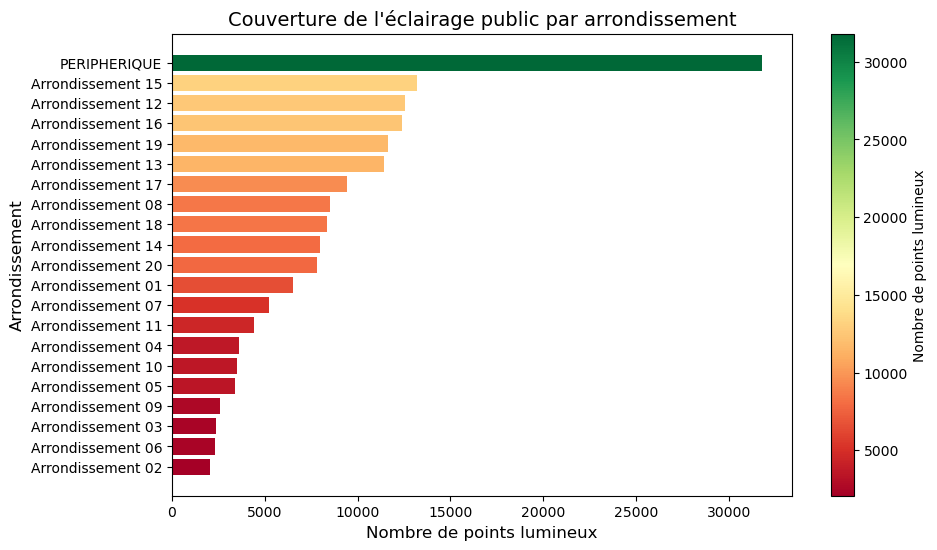

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


coverage_sorted = coverage_by_arrondissement.sort_values()
norm = mcolors.Normalize(vmin=coverage_sorted.min(), vmax=coverage_sorted.max())
cmap = plt.cm.RdYlGn
colors = [cmap(norm(value)) for value in coverage_sorted]


plt.figure(figsize=(10, 6))
plt.barh(coverage_sorted.index, coverage_sorted.values, color=colors)
plt.xlabel("Nombre de points lumineux", fontsize=12)
plt.ylabel("Arrondissement", fontsize=12)
plt.title("Couverture de l'éclairage public par arrondissement", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Nombre de points lumineux")
plt.show()


## Importation d'une base contenant les arrondissements de Paris depuis une API

In [42]:
url_api_arrondissements = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/arrondissements/records"
response2 = requests.get(url_api_arrondissements)
data = response2.json() 
results = data.get("results", []) 
df_arrondissements = pd.DataFrame(results)
df_arrondissements.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geom
0,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752587, 'lat': 48.84444315...","{'type': 'Feature', 'geometry': {'coordinates'..."
1,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"{'lon': 2.360728487847452, 'lat': 48.876130036...","{'type': 'Feature', 'geometry': {'coordinates'..."
2,750000018,18,75118,18ème Ardt,Buttes-Montmartre,750001537,5.996051e+06,9916.464176,"{'lon': 2.3481605195620396, 'lat': 48.89256926...","{'type': 'Feature', 'geometry': {'coordinates'..."
3,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876953655494, 'lat': 48.85617443...","{'type': 'Feature', 'geometry': {'coordinates'..."
4,750000006,6,75106,6ème Ardt,Luxembourg,750001537,2.153096e+06,6483.686786,"{'lon': 2.3328979990533147, 'lat': 48.84913035...","{'type': 'Feature', 'geometry': {'coordinates'..."


In [46]:
df_arrondissements_flt = df_arrondissements[['c_ar', 'surface', 'geom']]
df_arrondissements_flt.loc[:, 'surface'] = df_arrondissements_flt['surface'] / 1e6
df_arrondissements_flt.head()


,c_ar,surface,geom
0,5,2.539375,"{'type': 'Feature', 'geometry': {'coordinates'..."
1,10,2.891739,"{'type': 'Feature', 'geometry': {'coordinates'..."
2,18,5.996051,"{'type': 'Feature', 'geometry': {'coordinates'..."
3,7,4.090057,"{'type': 'Feature', 'geometry': {'coordinates'..."
4,6,2.153096,"{'type': 'Feature', 'geometry': {'coordinates'..."


In [49]:
df_test = df_eclairage_flt[df_eclairage_flt['lib_region'] != 'PERIPHERIQUE'].copy()
df_test['num_region'] = df_test['lib_region'].str.extract(r'(\d+)').astype(int)
df_test[['lib_region', 'num_region']].head()


,lib_region,num_region
0,Arrondissement 18,18
1,Arrondissement 17,17
2,Arrondissement 05,5
3,Arrondissement 08,8
4,Arrondissement 08,8


In [51]:
df_combined = pd.merge(
    df_test, 
    df_arrondissements_flt, 
    left_on='num_region',  
    right_on='c_ar',      
    how='inner'            
)
df_combined.head()